In [0]:
# Load the CSV file into a Spark DataFrame
df = spark.read.format("csv").option("header", "true").load("file:/Workspace/Users/azuser2126_mml.local@techademy.com/data.csv")

# Display the first 10 rows
df.show(10)

# Inspect the schema
df.printSchema()

+----------+-------+------+----+---------+---------+
|   FL_DATE|CARRIER|ORIGIN|DEST|DEP_DELAY|ARR_DELAY|
+----------+-------+------+----+---------+---------+
|2023-09-01|     AA|   ATL| DFW|        5|       10|
|2023-09-01|     UA|   LAX| JFK|       -3|        0|
|2023-09-01|     DL|   SFO| ORD|        7|       15|
|2023-09-02|     AA|   DFW| LAX|        0|       -5|
|2023-09-02|     UA|   JFK| ATL|       -2|        0|
|2023-09-02|     DL|   ORD| LAX|       20|       30|
|2023-09-03|     AA|   LAX| SFO|       10|       12|
|2023-09-03|     UA|   ATL| ORD|        0|      -10|
|2023-09-03|     DL|   SFO| JFK|        5|       25|
|2023-09-04|     AA|   JFK| LAX|        0|        0|
+----------+-------+------+----+---------+---------+
only showing top 10 rows

root
 |-- FL_DATE: string (nullable = true)
 |-- CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEP_DELAY: string (nullable = true)
 |-- ARR_DELAY: string (nullable =

In [0]:
# drop any rows containing null values
df = df.na.drop()
df.show()
#filter out rows where a specific column is less than or equal to zero
df = df.filter(df.ARR_DELAY > 0)

+----------+-------+------+----+---------+---------+
|   FL_DATE|CARRIER|ORIGIN|DEST|DEP_DELAY|ARR_DELAY|
+----------+-------+------+----+---------+---------+
|2023-09-01|     AA|   ATL| DFW|        5|       10|
|2023-09-01|     UA|   LAX| JFK|       -3|        0|
|2023-09-01|     DL|   SFO| ORD|        7|       15|
|2023-09-02|     AA|   DFW| LAX|        0|       -5|
|2023-09-02|     UA|   JFK| ATL|       -2|        0|
|2023-09-02|     DL|   ORD| LAX|       20|       30|
|2023-09-03|     AA|   LAX| SFO|       10|       12|
|2023-09-03|     UA|   ATL| ORD|        0|      -10|
|2023-09-03|     DL|   SFO| JFK|        5|       25|
|2023-09-04|     AA|   JFK| LAX|        0|        0|
|2023-09-04|     UA|   ORD| ATL|       15|       20|
|2023-09-04|     DL|   LAX| SFO|       -5|      -10|
|2023-09-05|     AA|   LAX| JFK|       20|       25|
|2023-09-05|     UA|   DFW| ATL|        0|        0|
|2023-09-05|     DL|   JFK| LAX|       10|       15|
+----------+-------+------+----+---------+----

In [0]:
from pyspark.sql.functions import avg
df_group=df.groupBy("CARRIER").agg(avg("ARR_DELAY").alias("avg_delay"))
df_group.show()
# find min,max,mean value for avg_delay
df.describe().show()

+-------+------------------+
|CARRIER|         avg_delay|
+-------+------------------+
|     UA|              20.0|
|     AA|15.666666666666666|
|     DL|             21.25|
+-------+------------------+

+-------+----------+-------+------+----+-----------------+-----------------+
|summary|   FL_DATE|CARRIER|ORIGIN|DEST|        DEP_DELAY|        ARR_DELAY|
+-------+----------+-------+------+----+-----------------+-----------------+
|  count|         8|      8|     8|   8|                8|                8|
|   mean|      NULL|   NULL|  NULL|NULL|             11.5|             19.0|
| stddev|      NULL|   NULL|  NULL|NULL|6.164414002968976|7.131419413913534|
|    min|2023-09-01|     AA|   ATL| ATL|               10|               10|
|    max|2023-09-05|     UA|   SFO| SFO|                7|               30|
+-------+----------+-------+------+----+-----------------+-----------------+



<Axes: xlabel='CARRIER'>

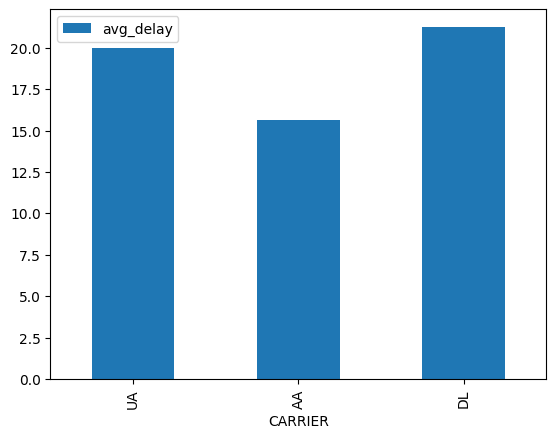

In [0]:
#create a bar graph showing the total count of entries for each category (eg: total number of flights per carrier)
df_group.toPandas().plot.bar(x='CARRIER', y='avg_delay')
#create